**Effectiveness Against Gaussian Noise**

The geometric mean filter is particularly effective against Gaussian noise due to its `multiplicative nature`, which helps in smoothing the image without significantly losing data. Unlike the arithmetic mean filter, which can blur edges and details, the geometric mean filter tends to preserve these features better while reducing noise. This is because it mitigates the influence of extreme pixel values (outliers), which can skew results when using arithmetic methods.

Comparison with Other Filters
- **Arithmetic Mean Filter:** This filter averages pixel values, which can **lead to blurring of edges** and loss of detail. It is less effective in preserving image quality when noise is present.

- **Median Filter:** While effective for removing salt-and-pepper noise, it may not perform as well for Gaussian noise compared to the geometric mean filter, especially when the **noise level is low or moderate**.

- **Gaussian Filter:** This filter assumes that noise follows a Gaussian distribution and works well under that assumption but **may not be as effective in preserving edges** compared to the geometric mean filter.

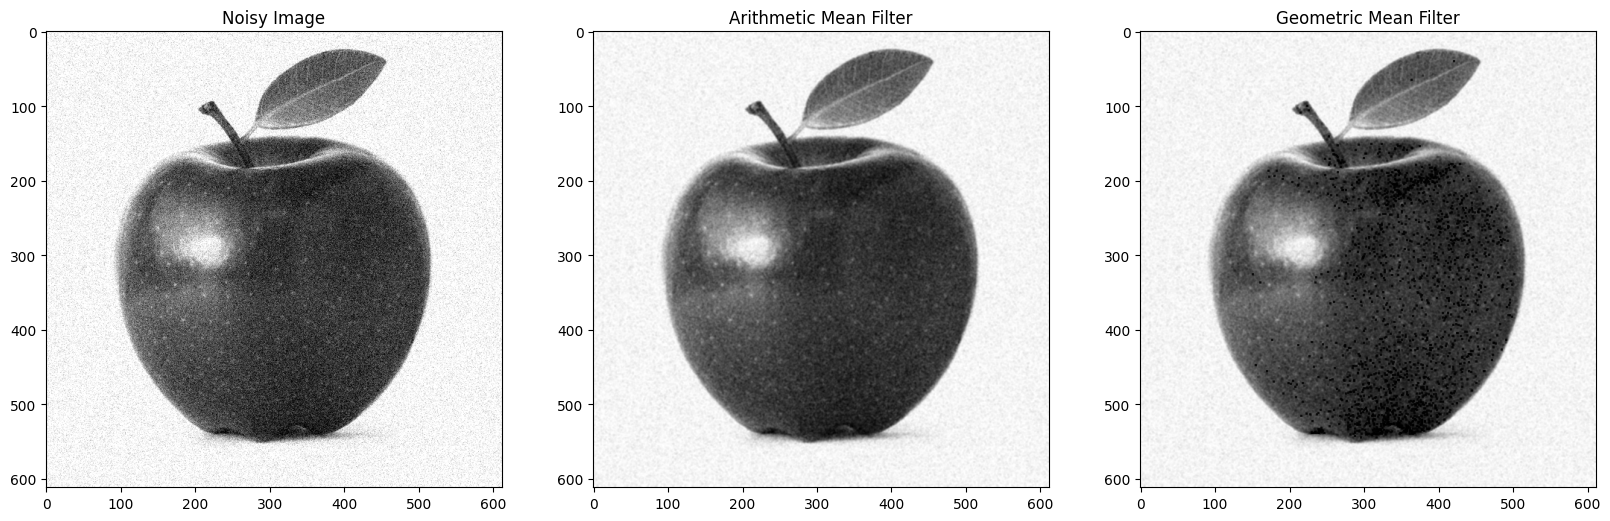

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a function for the geometric mean filter
def geometric_mean_filter(image, kernel_size=3):
    # Calculate geometric mean over a moving window
    pad_size = kernel_size // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    result = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract kernel window
            window = padded_image[i:i + kernel_size, j:j + kernel_size]
            # Calculate geometric mean
            result[i, j] = np.exp(np.mean(np.log(window + 1e-5)))  # small constant to avoid log(0)

    return result

# Generate a synthetic image and add Gaussian noise
# image = np.ones((100, 100), dtype=np.float32) * 128  # Create a gray image
image = cv2.imread('../../images/apple.jpg', cv2.IMREAD_GRAYSCALE)

noise = np.random.normal(0, 25, image.shape)         # Gaussian noise with mean 0 and stddev 25
noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)

# Apply arithmetic mean filter (using OpenCV blur for simplicity)
arithmetic_mean_filtered = cv2.blur(noisy_image, (3, 3))

# Apply geometric mean filter
geometric_mean_filtered = geometric_mean_filter(noisy_image, kernel_size=3)

# Display results
plt.figure(figsize=(20,12))
plt.subplot(1, 3, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Arithmetic Mean Filter")
plt.imshow(arithmetic_mean_filtered, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Geometric Mean Filter")
plt.imshow(geometric_mean_filtered, cmap='gray')

plt.show()

/tmp/ipykernel_11785/3710390275.py:27: RuntimeWarning: overflow encountered in scalar multiply
  temp = temp * img[i+l, j+k]


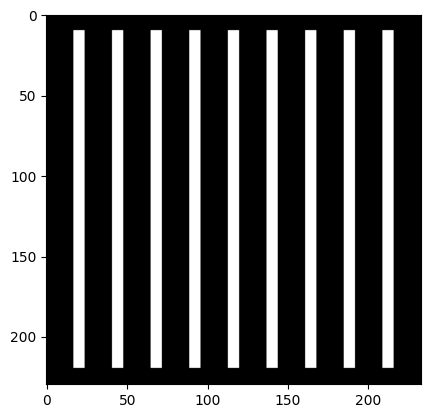

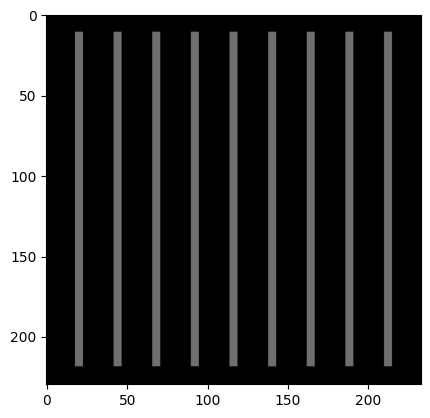

In [13]:
import cv2
import matplotlib.pyplot as plt 
import math
import numpy as np

#creating the image
img = np.zeros([230, 233])
img = img.astype(np.uint8) 
for i in range(10, 220):
    j = 0
    while j <= 192:
        for k in range(j+0, j+16):
            img[i, k] = 0
        for k in range(j+17, j+24):
            img[i, k] = 255
        j += 24

m, n = img.shape 
img_new = np.zeros([m, n]) 

# Convolve the 3X3 mask over the image 
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = 1
        for l in range(-1, 2):
            for k in range(-1, 2):
                temp = temp * img[i+l, j+k]
        temp = np.power(temp, 1/9)
        
        img_new[i, j]= temp
        
img_new = img_new.astype(np.uint8) 


# Display the images
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
plt.show()

# Display the images
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB)) 
plt.show()